In [35]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns
# for plotting graphs % matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib as matplot
%matplotlib inline

In [36]:
data=pandas.read_csv('HR_comma_sep.csv')

In [37]:
data.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,1,0.53,2,157,3,0,0,sales,low
1,0.80,1,0.86,5,262,6,0,0,sales,medium
2,0.11,1,0.88,7,272,4,0,0,sales,medium
3,0.72,1,0.87,5,223,5,0,0,sales,low
4,0.37,1,0.52,2,159,3,0,0,sales,low


In [38]:
data.tail()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
14994,0.40,1,0.57,2,151,3,0,0,support,low
14995,0.37,1,0.48,2,160,3,0,0,support,low
14996,0.37,1,0.53,2,143,3,0,0,support,low
14997,0.11,1,0.96,6,280,4,0,0,support,low
14998,0.37,1,0.52,2,158,3,0,0,support,low


In [39]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

data['Department']=le.fit_transform(data['Department'])
data['salary']=le.fit_transform(data['salary'])


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
left                     14999 non-null int64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null int32
salary                   14999 non-null int32
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


In [41]:
#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years','Department','salary']]
y=data['left']

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [43]:
logmodel = LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = logmodel.predict(X_test)

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



array([[3166,  262],
       [ 817,  255]], dtype=int64)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# Model MCC
print("MCC:",metrics.matthews_corrcoef(y_test, y_pred))

Accuracy: 0.7602222222222222
Precision: 0.4932301740812379
Recall: 0.23787313432835822
MCC: 0.2156694128428418


In [46]:
#Rename Columns for better readability 
data = data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'Department' : 'department',
                        'left' : 'Churn'
                        })

In [47]:
data = data.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [48]:
data.head()


,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,0.38,1,0.53,2,157,3,0,0,7,1
1,0.80,1,0.86,5,262,6,0,0,7,2
2,0.11,1,0.88,7,272,4,0,0,7,2
3,0.72,1,0.87,5,223,5,0,0,7,1
4,0.37,1,0.52,2,159,3,0,0,7,1


In [49]:
# Get Feature Importances
feature_importances = pd.DataFrame(logmodel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

NameError: name 'feature_importances' is not defined

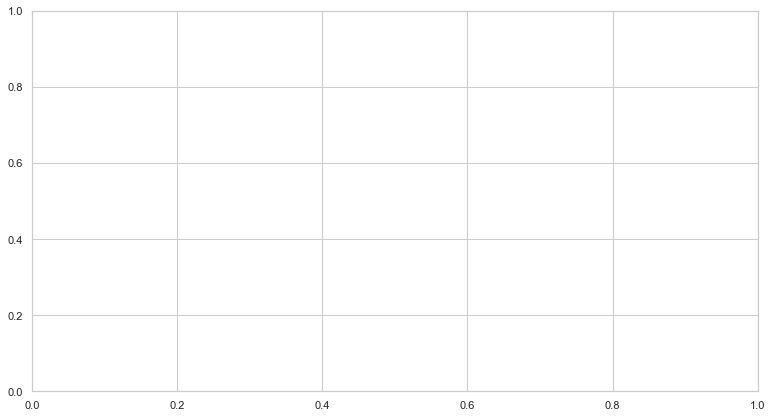

In [50]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="r")

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# Model MCC
print("MCC:",metrics.matthews_corrcoef(y_test, y_pred))